In [1]:
setwd('/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data2/')

In [2]:
d1 =read.csv('./sample75.diffgene.csv',row.names = 2)
d2 =read.csv('./sample35.diffgene.csv',row.names = 2)

In [3]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:dbplyr':

    ident, sql


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
d1.up = d1 %>%  dplyr::filter(group == 'Up') %>% rownames()
d2.up = d2 %>%  dplyr::filter(group == 'Up')%>% rownames()

In [11]:
d1.up = d1.up[! d1.up %in% c('1-Mar')]
d2.up = d2.up[! d2.up %in% c('1-Mar')]

In [12]:
intersect(d1.up,d2.up)

[1] "RASD2"   "TFEC"    "RPL34"   "CLEC2B"  "CSTA"    "EVI2A"   "IGJ"    
 [8] "TXN"     "LPAR6"   "BCL2A1"  "POLR2K"  "XRCC4"   "ZNF208"  "ZNF354A"
[15] "SCN9A"   "LSM3"    "GAPT"    "SUMO4"   "TAF7"    "SYCP2"   "ZNF480" 
[22] "SAMD9"   "ZBED5"   "FAM200B"

In [13]:
length(intersect(d1.up,d2.up))

[1] 24

In [14]:
d1.down = d1 %>%  dplyr::filter(group == 'Down') %>% rownames()
d2.down = d2 %>%  dplyr::filter(group == 'Down')%>% rownames()

In [16]:
d1.down = d1.down[! d1.down %in% c('MT-ND4L')]
d2.down = d2.down[! d2.down %in% c('MT-ND4L')]

In [17]:
length(intersect(d1.down,d2.down))

[1] 45

In [18]:
intersect(d1.down,d2.down)

[1] "BZRAP1"   "OSBPL7"   "CACNA2D2" "OSBPL5"   "SH2D2A"   "VCL"     
 [7] "ARHGAP6"  "PITPNM2"  "ARVCF"    "IL2RB"    "MLC1"     "FSD1"    
[13] "ATP1A3"   "PTPRS"    "ATG2A"    "GNLY"     "NID1"     "PILRB"   
[19] "BAI2"     "KIR2DL1"  "FOSB"     "SPOCD1"   "TLN1"     "STON2"   
[25] "KIFC3"    "ERBB2"    "DAB2"     "BMP6"     "PCDH1"    "DUSP2"   
[31] "SPON2"    "LMNA"     "MAP1A"    "DDIT4"    "SH3TC2"   "CLSTN1"  
[37] "CARNS1"   "HCFC1"    "PER1"     "PRF1"     "F2R"      "FLNA"    
[43] "PDGFA"    "NCR3"     "GPR56"

In [21]:
library(VennDiagram)

Loading required package: grid

Loading required package: futile.logger

Warning message:
"package 'futile.logger' was built under R version 4.2.3"


In [30]:

venn_list <- list(TrainSet_UP = d1.up, TrainSet_DW = d1.down, ValidationSet.UP = d2.up, ValidationSet.DW = d2.down)

v1 = venn.diagram(venn_list,filename = NULL, #imagetype = 'png', 
    fill = c('red', 'blue', 'green', 'orange'), alpha = 0.50, 
    cat.col = c('red', 'blue', 'green', 'orange'), cat.cex = 1.5, cat.fontfamily = 'serif',
    col = c('red', 'blue', 'green', 'orange'), cex = 1.5, fontfamily = 'serif')

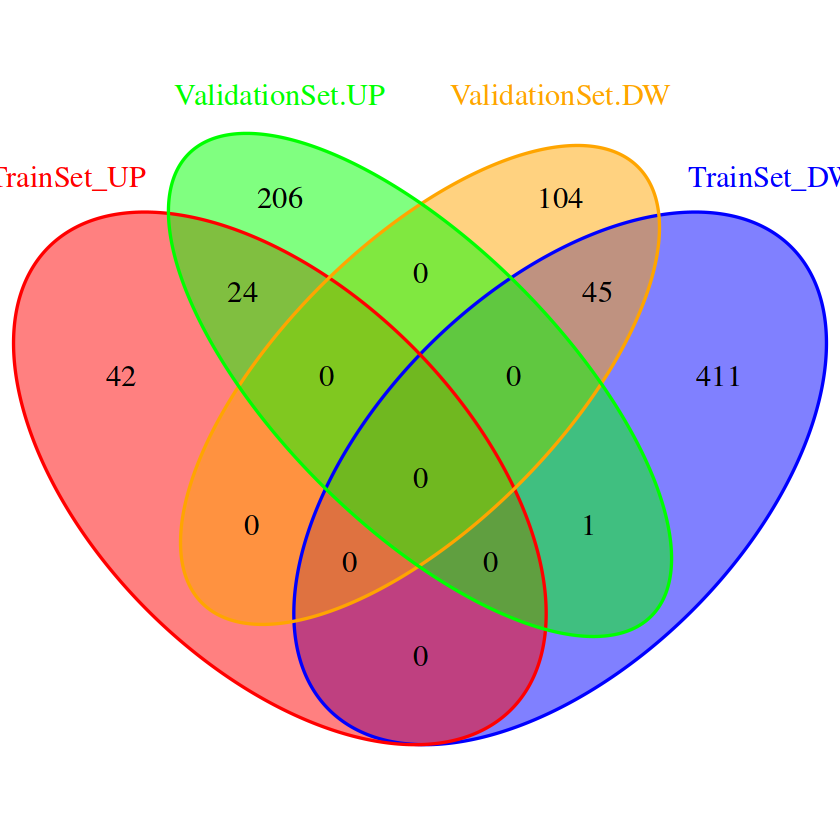

In [34]:
cowplot::plot_grid(v1)

In [35]:
pdf('./fig.re/figure.venn2.pdf',width = 6,height = 6)
cowplot::plot_grid(v1)
dev.off()

png 
  2